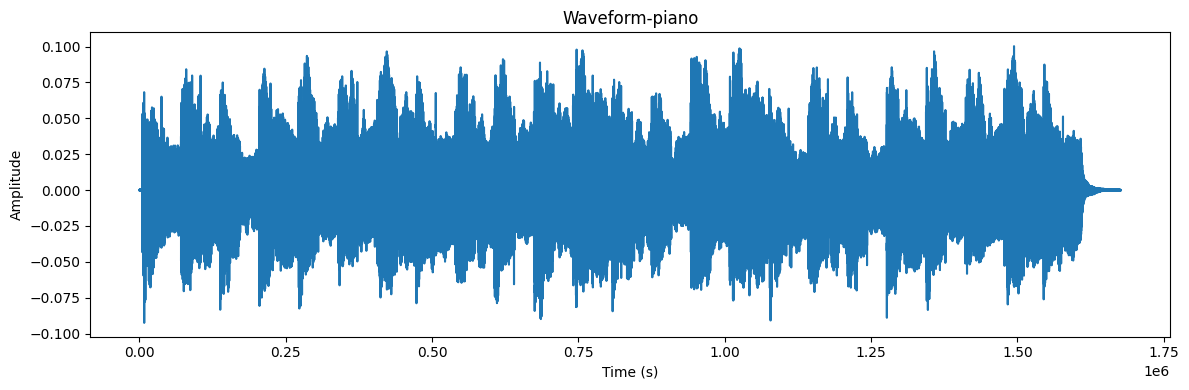

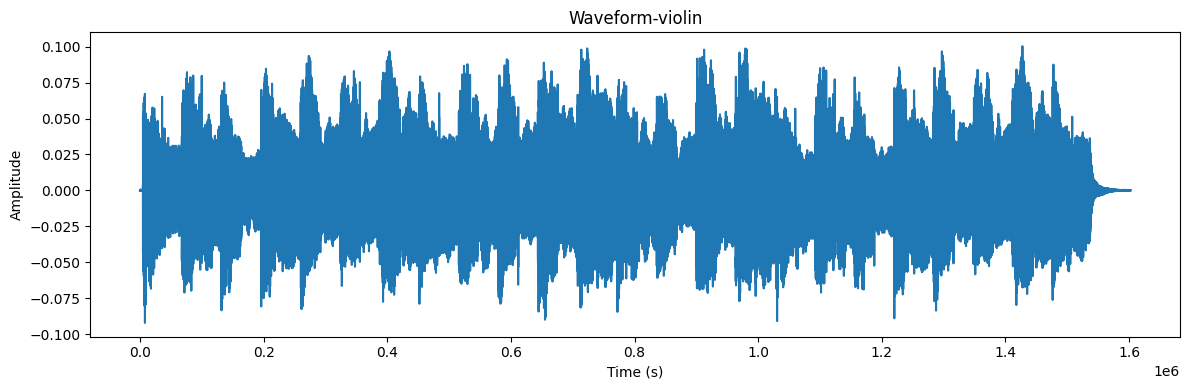

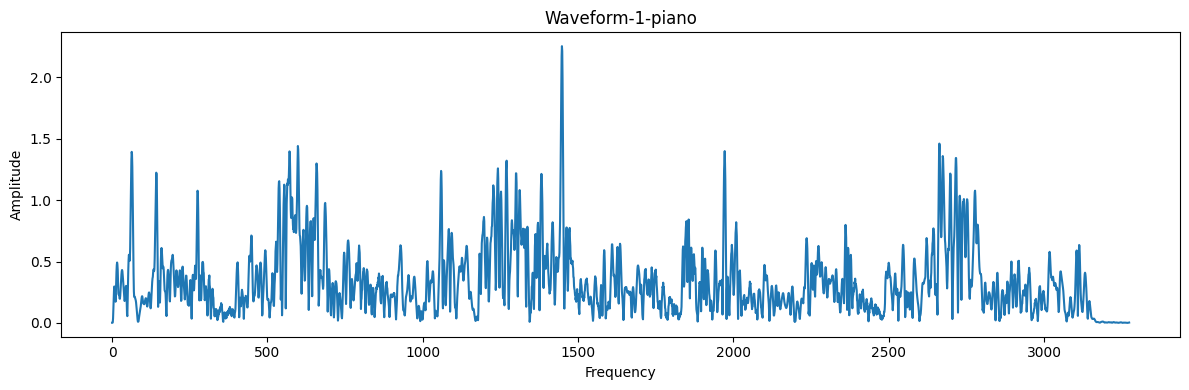

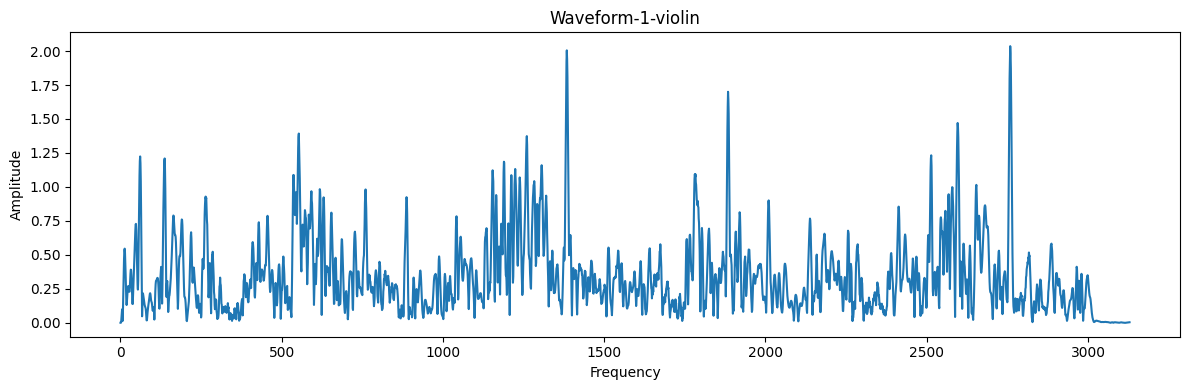

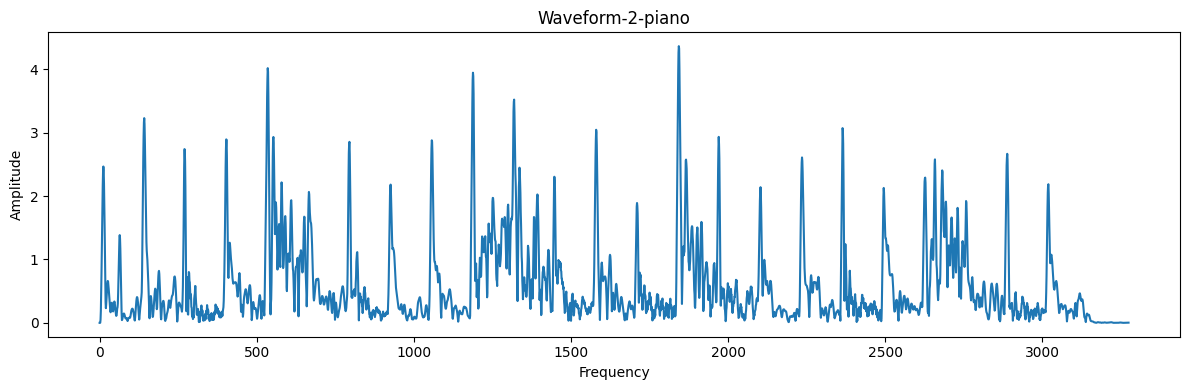

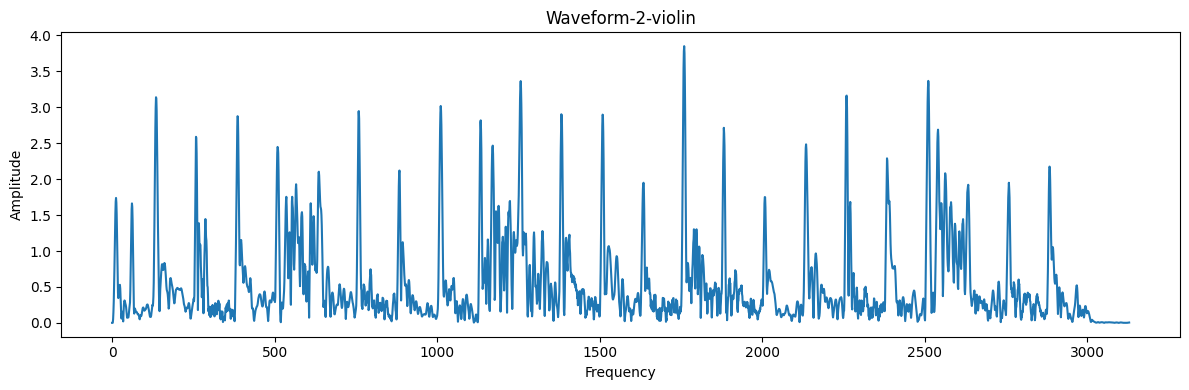

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 同一首歌不同種樂器
filename1 = r"一閃一閃小星星 (Twinkle Twinkle Little Star) 鋼琴教學 (MEDIUM) (mp3cut.net).wav"
filename2 = r"Twinkle Twinkle Little Star Violin Tutorial ｜ Children Songs ｜ 小提琴入門班 ｜ 小星星 ｜ 兒 (mp3cut.net).wav"
# 設定要提取的特定頻率範圍
target_frequency = (260, 263)  # 包括中央C的頻率範圍

# 載入音頻檔案
audio1, sr1 = librosa.load(filename1, sr=None)
audio2, sr2 = librosa.load(filename2, sr=None)

# 執行短時傅立葉變換
stft1 = np.abs(librosa.stft(audio1, hop_length=512, n_fft=2048 * 4))
stft2 = np.abs(librosa.stft(audio2, hop_length=512, n_fft=2048 * 4))
# print(stft[0])
# print(stft1)
# print("\n")
# print(stft2)
frequencies1 = librosa.core.fft_frequencies(n_fft=2048*4)  # 取得頻率陣列
frequencies2 = librosa.core.fft_frequencies(n_fft=2048*4) 
# 將目標頻率範圍之外的頻率分量置零
start_index1 = np.argmax(frequencies1 >= target_frequency[0])
end_index1 = np.argmax(frequencies1 > target_frequency[1])

start_index2 = np.argmax(frequencies2 >= target_frequency[0])
end_index2 = np.argmax(frequencies2 > target_frequency[1])

# 執行逆短時傅立葉變換，得到特定頻率的波形
filtered_audio1 = librosa.istft(stft1)
filtered_audio2 = librosa.istft(stft2)

# 劃出原始音樂的波型(樂器1)
plt.figure(figsize=(12, 4))
plt.plot(audio1)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform-piano")
plt.tight_layout()
plt.show()


# 劃出原始音樂的波型(樂器2)
plt.figure(figsize=(12, 4))
plt.plot(audio2)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform-violin")
plt.tight_layout()
plt.show()


# 劃出轉換後的波型
# N個頻率並排顯示來方便比較樂器的音色差別
plt.figure(figsize=(12, 4))
plt.plot(stft1[10])  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform-1-piano")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(stft2[10])  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform-1-violin")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(stft1[12])  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform-2-piano")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(stft2[12])  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform-2-violin")
plt.tight_layout()
plt.show()